In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/students.csv")
df.head()

,student_id,name,gender,subject,marks,attendance
0,1,Ali,Male,Math,85,92
1,2,Sara,Female,Math,78,88
2,3,Ahmed,Male,Math,90,95
3,4,Ayesha,Female,Math,66,80
4,5,Hassan,Male,CS,92,96


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  16 non-null     int64 
 1   name        16 non-null     object
 2   gender      16 non-null     object
 3   subject     16 non-null     object
 4   marks       16 non-null     int64 
 5   attendance  16 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 900.0+ bytes


,student_id,marks,attendance
count,16.000000,16.000000,16.000000
mean,8.500000,79.062500,88.625000
std,4.760952,9.767079,5.818075
min,1.000000,60.000000,78.000000
25%,4.750000,73.000000,84.750000
50%,8.500000,79.500000,89.000000
75%,12.250000,88.250000,93.250000
max,16.000000,92.000000,97.000000


In [7]:
#...Check missing values...
print(df.isnull().sum())

student_id    0
name          0
gender        0
subject       0
marks         0
attendance    0
dtype: int64


In [9]:
#...Grading...
def assign_grade(marks):
    if marks >= 85:
        return "A"
    elif marks >= 80:
        return "A-"
    elif marks >= 76:
        return "B+"
    elif marks >= 70:
        return "B-"
    elif marks >= 65:
        return "B"
    elif marks >= 60:
        return "C+"
    elif marks >= 55:
        return "C"
    elif marks >= 50:
        return "D"
    else:
        return "F"

df["grade"] = df["marks"].apply(assign_grade)
df.head()

,student_id,name,gender,subject,marks,attendance,g,grade
0,1,Ali,Male,Math,85,92,A,A
1,2,Sara,Female,Math,78,88,B+,B+
2,3,Ahmed,Male,Math,90,95,A,A
3,4,Ayesha,Female,Math,66,80,B,B
4,5,Hassan,Male,CS,92,96,A,A


In [ ]:
#...Average Marks by SUbject...
avg_subject = df.groupby("subject")['marks'].mean()
avg_subject

subject
CS         84.00
English    78.75
Math       79.75
Physics    73.75
Name: marks, dtype: float64

In [12]:
#...Gender-wise Performance...
gender_avg = df.groupby("gender")["marks"].mean()
gender_avg

gender
Female    76.625
Male      81.500
Name: marks, dtype: float64

In [14]:
#...Attendance VS Marks...
df[["attendance" , "marks"]].corr()

,attendance,marks
attendance,1.000000,0.985911
marks,0.985911,1.000000


### **Bar Chart – Avg Marks per Subject**

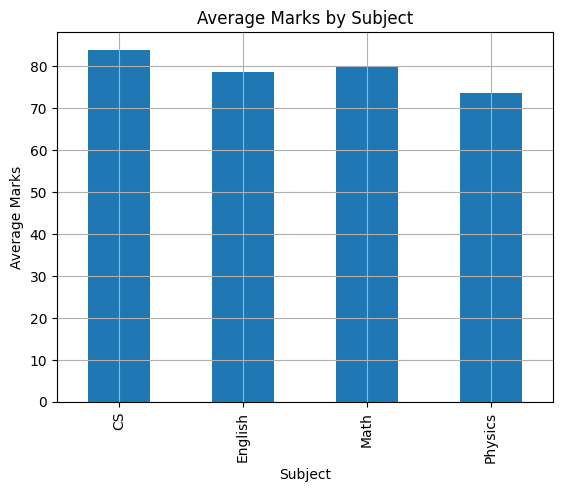

In [16]:
avg_subject.plot(kind='bar')
plt.title("Average Marks by Subject")
plt.xlabel("Subject")
plt.ylabel("Average Marks")
plt.grid()
plt.show()


### **Pie Chart – Grade Distribution**

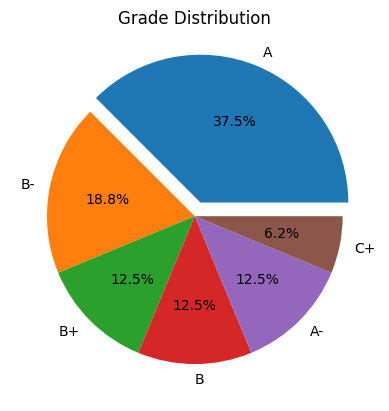

In [24]:
explode = (0.1 , 0 , 0 , 0 , 0 , 0)
df['grade'].value_counts().plot(kind="pie" ,autopct="%1.1f%%" , explode=explode)
plt.title("Grade Distribution")
plt.ylabel("")
plt.show()

### **Histogram – Marks Distribution**

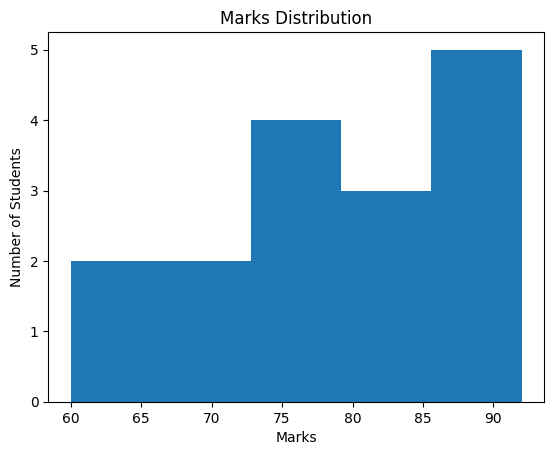

In [25]:
plt.hist(df['marks'] , bins=5)
plt.title("Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Number of Students")
plt.show()

### **Scatter Plot – Attendance vs Marks**

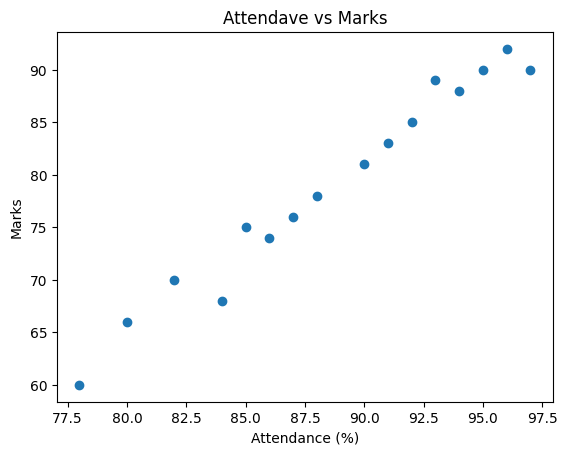

In [27]:
plt.scatter(df['attendance'] , df['marks'])
plt.title("Attendave vs Marks")
plt.xlabel("Attendance (%)")
plt.ylabel("Marks")
plt.show()